linear & multiple regression & polynomial regression

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# data 
score = pd.DataFrame(np.array([[2.5 ,21] ,[5.1 , 47], [3.2, 27] ,[8.5,75] , [3.5 , 50], [1.5, 20]]),
                         
                         columns = ["Hours" , "Scores"])

In [3]:
score.describe(include = "all")

,Hours,Scores
count,6.000000,6.000000
mean,4.050000,40.000000
std,2.483345,21.466253
min,1.500000,20.000000
25%,2.675000,22.500000
50%,3.350000,37.000000
75%,4.700000,49.250000
max,8.500000,75.000000


<AxesSubplot:xlabel='Hours'>

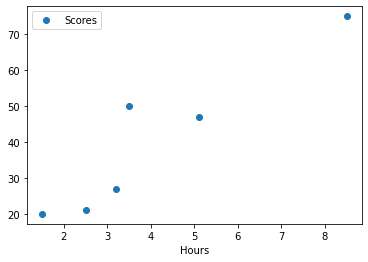

In [4]:
score.plot(x = "Hours" , y = "Scores", style = 'o')

In [5]:
X =  score.iloc[: ,:-1].values
y =  score.iloc[: , 1].values

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [16]:
print(reg.coef_)
print(reg.intercept_)

[8.07848224]
7.282146910977794


In [19]:
y_pred = reg.predict(X)
df = pd.DataFrame({"Actual" : y , "Predicted": y_pred})

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
# print(f'MSE:{mean_squared_error(y_pred , y)}')
# print(f'r2 score :{r2_score(y , y_pred)}')

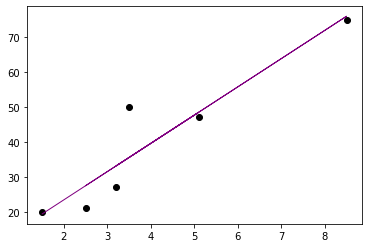

In [27]:
# plotting the data and fitted function
plt.scatter(X , y , color  = "black")
plt.plot(X ,y_pred, color = "purple" , linewidth=1)

more than one independant variable(multiple linear regression) 

In [31]:
from sklearn import datasets

In [32]:
 d = datasets.load_boston()

C:\Users\Joshi Mayuresh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [50]:
data = pd.DataFrame(data = d.data , columns = d.feature_names)
target  = pd.DataFrame(data = d.target, columns = ["house price"])

In [51]:
# train test split 

In [52]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(data , target , test_size = 0.2)

In [53]:
reg.fit(X_train , y_train)
print(reg.intercept_)
print(reg.coef_)
y_pred = reg.predict(X_test)

[34.5751161]
[[-1.25007294e-01  3.90840325e-02 -1.20843334e-02  2.13592487e+00
  -1.62039516e+01  3.82705196e+00 -1.06360268e-02 -1.39552163e+00
   2.66674648e-01 -1.27269043e-02 -8.78420255e-01  8.35907135e-03
  -4.26590224e-01]]


In [57]:
df  = pd.concat([pd.DataFrame(y_test.values) , pd.DataFrame(y_pred)]  , axis =1 )

In [58]:
df.columns = ["acu" , "pred"]

In [59]:
mean_squared_error(pd.DataFrame(y_test.values) , pd.DataFrame(y_pred))
r2_score(pd.DataFrame(y_test.values) , pd.DataFrame(y_pred))

0.7191103479703993

polynomial regression also covered 

In [60]:
# for polynomial regression hours and marks data 
score

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,50.0
5,1.5,20.0


In [61]:
Hours = np.array(score.Hours)
Scores = np.array(score.Scores)

In [62]:
# using numpy's polyfit library

In [86]:
my_model = np.poly1d(np.polyfit(Hours , Scores ,3)) # the 3 signifies what degree of fit we want 
# the np.polyfit will return the coefficients for the fit 
# np.poly1d will create a poly1d object which can be used for prediction with ease 

my_model(Hours) #my_model is the poly1d object and the argument is the independant variable.

array([27.37663231, 49.89468041, 33.8182121 , 74.80515889, 36.48772269,
       17.61759359])

In [85]:
#plotting polynomials

r2_score : 0.8768124600539278
mse : 47.30401533929176


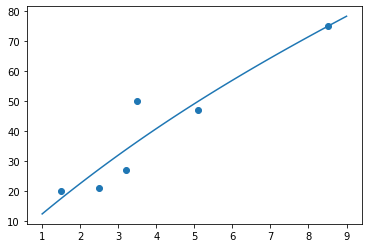

In [84]:
plt.scatter(Hours ,Scores)
x = np.linspace(1, 9,100)
plt.plot(x, my_model(x))
print(f"r2_score : {r2_score(Scores , my_model(Hours))}")
print(f"mse : {mean_squared_error(Scores , my_model(Hours))}")

Logistic Regression 

In [87]:
dataset = pd.DataFrame({"Age" :np.random.randint(18 ,35 ,400 ), "Salary" : np.random.randint(10000 , 1000000 , 400), "Purchased":np.random.randint(0,2 , 400)})

In [92]:
X =  dataset.iloc[: , [0,1]].values # values will give only the values of the  pandas series 
y =  dataset.iloc[: , -1].values
# X is 2d array y is a 1d array 

In [93]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train , y_test  = train_test_split(X , y , test_size = 0.2 )

In [98]:
from sklearn.preprocessing import StandardScaler # shift the data to 0 mean and 1 standered deviation
# to scale the features 
sc_x = StandardScaler()
sc_x.fit(X)
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.fit_transform(X_test)
print(x_train[:10 , :])

[[ 0.24693109  1.47815764]
 [ 0.04115518  1.00918374]
 [ 0.452707    1.47658247]
 [ 0.86425882  0.4978255 ]
 [ 1.68736246  0.9259315 ]
 [-0.16462073  0.43527492]
 [ 0.86425882 -0.64355677]
 [-0.78194846 -0.34476272]
 [-0.16462073 -0.72785566]
 [ 1.07003473  1.41063631]]


In [100]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train ,y_train)

LogisticRegression()

In [104]:
y_pred  = classifier.predict(x_test)

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

[[ 6 32]
 [ 7 35]]
Accuracy: 0.5125


logistic regression 2 : image classification

In [109]:
import seaborn as sns ; sns.set()
from scipy import stats

In [112]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


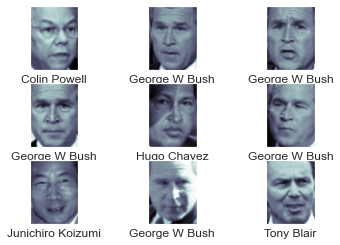

In [119]:
fig , ax = plt.subplots(3,3 )
for i , axi  in enumerate(ax.flat):
    axi.imshow(faces.images[i] , cmap = "bone")
    axi.set(xticks = [] ,yticks  =[],xlabel=faces.target_names[faces.target[i]])

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [124]:
X_train , X_test , y_train , y_test = train_test_split(faces.data , faces.target , test_size= 0.2 , random_state=1244)

In [125]:
model.fit(X_train , y_train )

C:\Users\Joshi Mayuresh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [138]:
yfit = model.predict(X_test)

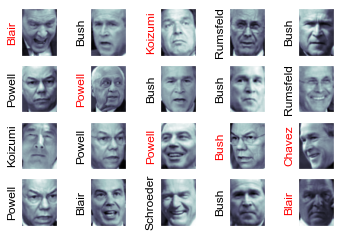

In [143]:
# some test pattern with their prediction:
fig, ax  = plt.subplots(4 , 5 )
for i ,axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62,47) , cmap = "bone")
    axi.set(xticks =[] , yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1] ,color = "black" if yfit[i] == y_test[i]
                  else  "red")

In [147]:
from sklearn.metrics import classification_report

In [148]:
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, yfit, target_names= faces.target_names))
cm = confusion_matrix(y_test , yfit)
print(cm)

                   precision    recall  f1-score   support

     Ariel Sharon       0.88      0.78      0.82        18
     Colin Powell       0.86      0.84      0.85        50
  Donald Rumsfeld       0.57      0.63      0.60        19
    George W Bush       0.85      0.90      0.87       105
Gerhard Schroeder       0.80      0.67      0.73        24
      Hugo Chavez       0.77      1.00      0.87        10
Junichiro Koizumi       0.92      0.92      0.92        13
       Tony Blair       0.82      0.74      0.78        31

         accuracy                           0.83       270
        macro avg       0.81      0.81      0.81       270
     weighted avg       0.83      0.83      0.83       270

[[14  1  2  0  1  0  0  0]
 [ 2 42  1  5  0  0  0  0]
 [ 0  3 12  3  1  0  0  0]
 [ 0  2  4 94  1  2  0  2]
 [ 0  0  1  3 16  1  1  2]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0 12  1]
 [ 0  1  1  5  1  0  0 23]]
